In [1]:
# project: p9
# submitter: csharma4@wisc.edu
# partner: none
# hours: 4

In [2]:
import csv
import matplotlib
import pandas

In [3]:
def plot_dict(d,label):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [4]:
def year_to_decade(year):
    if year % 10 == 0:
        decade_start = year - 9 #Complete this line/lines
    else:
        decade_start = year - (year % 10) + 1
        #Complete this line/lines
    ans = str(decade_start) + ' to ' + str(decade_start + 9)
    # you can either return here, or delete this return statement
    # and return above this line
    return ans

In [5]:
def median(items):
    itemSort = sorted(items)
    if len(items) % 2 != 0:
        median = itemSort[int(len(items)/2)]
        return median
    else:
        mid1 = itemSort[int(len(items)/2 - 1)]
        mid2 = itemSort[int(len(items)/2)]
        median = (mid1 + mid2)/2
        return median

In [6]:
def find_specific_movies(movies, keyword):
    '''given a list of movie dictionaries and a keyword,
    returns a list of movies that contains the keyword'''
    movies_new = list()
    for movie in movies:
        if (keyword in movie['title']) or (keyword in movie['genres']) \
            or (keyword in movie['directors']) or (keyword in movie['actors']):
            movies_new.append(movie)
    return movies_new

In [7]:
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data
def get_mapping(path):
    """
    Converts mapping csv list of lists data into a dict with keys as IDs and values as names.
    """
    import csv
    # Task 2.2 of Lab-P8 has all the necessary steps to complete this function.
    # You just need to copy/paste the relevant code, identify the input and output of the function.
    csv_Data = process_csv(path)
    mapping_rows = []
    for i in range(len(csv_Data)):
        mapping_rows.append(csv_Data[i])
    mapping_dict = {}
    Ids = []
    names = []
    for i in range(len(mapping_rows)):
        Ids.append(mapping_rows[i][0])
        names.append(mapping_rows[i][1])
    for i in range(len(Ids)):
        if Ids[i] not in mapping_dict:
            mapping_dict[Ids[i]] = None
        if  mapping_dict[Ids[i]] == None:
            mapping_dict[Ids[i]] = names[i]
    return mapping_dict
def get_raw_movies(path):
    """
    Converts movies csv list of lists data into a dict with keys as column names and values as corresponding type converted values.
    """
    # Task 2.1 and 2.3c of Lab-P8 have all the necessary steps to complete this function.
    # You just need to copy/paste the relevant code, identify the input and output of the function.
    csv_rows = process_csv(path)
    csv_header = csv_rows[0]
    csv_data = csv_rows[1:]
    data = {}
    split = []
    final = []
    for row in csv_data:
        for i in range(len(row)):
            if csv_header[i] == "actors" or csv_header[i] == "genres" or csv_header[i] == "directors":
                split = row[i].split(', ')
                data[csv_header[i]] = split
            elif csv_header[i] == "rating":
                val = float(row[i])
                data[csv_header[i]] = val
            elif csv_header[i] == "duration":
                val = int(row[i])
                data[csv_header[i]] = val
            elif csv_header[i] == "year":
                val = int(row[i])
                data[csv_header[i]] = val
            else: 
                data[csv_header[i]] = row[i]
        final.append(data.copy())
    return final
def get_movies(movies_path, mapping_path):
    csv_rows = process_csv("movies.csv")
    csv_header = csv_rows[0]
    csv_data = csv_rows[1:]
    raw_movies = get_raw_movies(movies_path)
    movies = raw_movies.copy()
    mapping = get_mapping(mapping_path)
    for row in range(len(raw_movies)):
        if "title" in raw_movies[row].keys():
            title = mapping.get(raw_movies[row]["title"])
            movies[row]["title"] = title
        if "actors" in raw_movies[row].keys():
            for i in range(len(raw_movies[row]["actors"])):
                actor = mapping.get(raw_movies[row]["actors"][i])
                movies[row]["actors"][i] = actor
        if "directors" in raw_movies[row].keys():
            for i in range(len(raw_movies[row]["directors"])):
                director = mapping.get(raw_movies[row]["directors"][i])
                movies[row]["directors"][i] = director
    return movies

In [8]:
movies = get_movies("movies.csv", "mapping.csv")

In [9]:
#Q1: What is the average rating of the 'Harry Potter' movies directed by 'David Yates'?
HarryPotter = find_specific_movies(movies,'Harry Potter') 
movieReq = []
for movie in HarryPotter:
    if 'David Yates' in movie['directors']:
        movieReq.append(movie) 
sum = 0
for movie in movieReq:
    sum += movie['rating']
average = sum/(len(movieReq))
average

7.725

In [10]:
#Q2: What is the median rating of all 'Ice Age' movies?
IceAge = find_specific_movies(movies,'Ice Age')
ratingIA = []
for movie in IceAge:
    ratingIA.append(movie['rating'])
median(ratingIA)

6.8

In [11]:
#Q3: What are all the movies that have the lowest rating?
lowest = 1000000
for movie in movies:
    if movie['rating'] <= lowest:
        lowest = movie['rating']
lowRating = []
for movie in movies:
    if movie['rating'] == lowest:
        lowRating.append(movie)
lowRating

[{'title': 'Proud American',
  'year': 2008,
  'genres': ['Drama'],
  'duration': 115,
  'directors': ['Fred Ashman'],
  'actors': ['Michael G. Davis',
   'Cecelia Antoinette',
   'Marie Antoinette',
   'Michelle Ashman'],
  'rating': 1.1},
 {'title': 'Troy: The Resurrection of Aeneas',
  'year': 2018,
  'genres': ['Animation', 'Action', 'Adventure'],
  'duration': 60,
  'directors': ['Aeneas Middleton'],
  'actors': ['Aeneas Middleton', 'Hardley Davidson'],
  'rating': 1.1},
 {'title': 'Browncoats: Independence War',
  'year': 2015,
  'genres': ['Action', 'Sci-Fi', 'War'],
  'duration': 98,
  'directors': ['Francis Hamada'],
  'actors': ['Beth Bemis',
   'Richard Martinsen',
   'Will James Johnson',
   'Nathan Cosmo Rahn'],
  'rating': 1.1},
 {'title': 'The Time Machine (I Found at a Yardsale)',
  'year': 2011,
  'genres': ['Sci-Fi'],
  'duration': 84,
  'directors': ['Steven A. Sandt'],
  'actors': ['George Abdelmalak', 'Steven Ronald Brattman', 'Elise Caloca'],
  'rating': 1.1},
 {'

In [12]:
def max_rated_movies(movie_list):
    """
    Input: A list of movies.
    Return: A list of highest rated movies among the input list.
    """
    highest = 0
    for movie in movie_list:
        if movie['rating'] > highest:
            highest = movie['rating']
    maxRating = []
    for movie in movie_list:
        if movie['rating'] == highest:
            maxRating.append(movie)
    return maxRating

In [13]:
#Q4: Among all the 'Avengers' movies, which ones are highest rated?
Avengers = find_specific_movies(movies,'Avengers')
max_rated_movies(Avengers)

[{'title': 'Avengers: Infinity War',
  'year': 2018,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'duration': 149,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'actors': ['Robert Downey Jr.',
   'Chris Hemsworth',
   'Mark Ruffalo',
   'Chris Evans',
   'Scarlett Johansson'],
  'rating': 8.4},
 {'title': 'Avengers: Endgame',
  'year': 2019,
  'genres': ['Action', 'Adventure', 'Drama'],
  'duration': 181,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'actors': ['Robert Downey Jr.',
   'Chris Evans',
   'Mark Ruffalo',
   'Chris Hemsworth',
   'Scarlett Johansson'],
  'rating': 8.4}]

In [14]:
def bucketize(movie_list, category):
    """
    Input: A list of movies and a category string.
    Return: A dictionary that bucketizes `movie_list` by `category`.
    Requirements: See the instructions in README.md
    """
    buckets = {}
    if category == "actors" or category == "directors" or category == "genres":
        for movie in movie_list:
            for i in range(len(movie[category])):
                var = movie[category][i]
                if not var in buckets:
                    buckets[var] = []
                buckets[var].append(movie)
    else:
        for movie in movie_list:
            var = movie[category]
            if not var in buckets:
                buckets[var] = []
            buckets[var].append(movie)
    return buckets

In [15]:
# Buceketize the full list of movies by their actors.
actors_buckets = bucketize(movies,'actors')
# Buceketize the full list of movies by their directors.
directors_buckets = bucketize(movies,'directors')
# Buceketize the full list of movies by their genre.
genre_buckets = bucketize(movies,'genres')
# Buceketize the full list of movies by their year.
year_buckets = bucketize(movies,'year')

In [16]:
#Q5: Which movies did 'Octavia Spencer' act in?
actors_buckets['Octavia Spencer']

[{'title': 'A Kid Like Jake',
  'year': 2018,
  'genres': ['Drama', 'Family'],
  'duration': 92,
  'directors': ['Silas Howard'],
  'actors': ['Claire Danes',
   'Jim Parsons',
   'Octavia Spencer',
   'Priyanka Chopra'],
  'rating': 5.4},
 {'title': 'Hidden Figures',
  'year': 2016,
  'genres': ['Biography', 'Drama', 'History'],
  'duration': 127,
  'directors': ['Theodore Melfi'],
  'actors': ['Taraji P. Henson', 'Octavia Spencer', 'Janelle Monáe'],
  'rating': 7.8},
 {'title': 'The Shape of Water',
  'year': 2017,
  'genres': ['Adventure', 'Drama', 'Fantasy'],
  'duration': 123,
  'directors': ['Guillermo del Toro'],
  'actors': ['Sally Hawkins',
   'Michael Shannon',
   'Richard Jenkins',
   'Octavia Spencer'],
  'rating': 7.3},
 {'title': 'Car Dogs',
  'year': 2016,
  'genres': ['Comedy', 'Drama'],
  'duration': 104,
  'directors': ['Adam Collis'],
  'actors': ['Octavia Spencer',
   'Alessandra Torresani',
   'Patrick J. Adams',
   'Nia Vardalos'],
  'rating': 5.0},
 {'title': 'Sm

In [17]:
#Q6: Which movies did 'George Takei' act in.
actors_buckets['George Takei']

[{'title': 'Ninja Cheerleaders',
  'year': 2008,
  'genres': ['Action', 'Comedy'],
  'duration': 81,
  'directors': ['David Presley'],
  'actors': ['Trishelle Cannatella',
   'Ginny Weirick',
   'Maitland McConnell',
   'George Takei'],
  'rating': 3.3},
 {'title': 'Live by the Fist',
  'year': 1993,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 77,
  'directors': ['Cirio H. Santiago'],
  'actors': ['Jerry Trimble', 'George Takei', 'Ted Markland'],
  'rating': 4.3},
 {'title': 'Free Birds',
  'year': 2013,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 91,
  'directors': ['Jimmy Hayward'],
  'actors': ['Owen Wilson', 'Woody Harrelson', 'Amy Poehler', 'George Takei'],
  'rating': 5.8}]

In [18]:
genres = []
for key in genre_buckets:
    genres.append(key)

In [19]:
#Q7: How many movies are in each genre?
genreMovies = {}
for genre in genres:
    if genre not in genreMovies:
        genreMovies[genre] = len(genre_buckets[genre])

genreMovies

{'Action': 5611,
 'Horror': 5175,
 'Sci-Fi': 2148,
 'Crime': 5078,
 'Thriller': 5340,
 'Comedy': 11130,
 'Drama': 16410,
 'Romance': 5753,
 'History': 627,
 'Adventure': 3849,
 'Western': 1177,
 'Family': 1585,
 'Fantasy': 1537,
 'War': 779,
 'Sport': 565,
 'Biography': 1009,
 'Mystery': 2479,
 'Film-Noir': 647,
 'Music': 908,
 'Animation': 676,
 'Musical': 941,
 'Reality-TV': 1,
 'Documentary': 1,
 'News': 1}

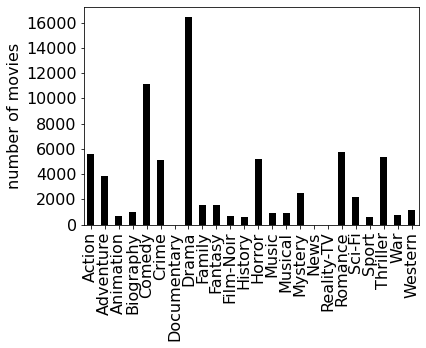

In [20]:
#Q8: Plot the number of movies in each genre as a bar graph.
plot_dict(genreMovies,'number of movies')

In [21]:
years = []
for movie in movies:
    years.append(movie['year'])
years = list(set(years))

In [22]:
#Q9: Find the number of movies released in each decade.
decadeMovies = {}
for year in years:
    decade = year_to_decade(year)
    decadeMovies[decade] = 0
for year in years:
    decade = year_to_decade(year)
    decadeMovies[decade] += len(year_buckets[year])
decadeMovies

{'1911 to 1920': 120,
 '1921 to 1930': 496,
 '1931 to 1940': 2256,
 '1941 to 1950': 2256,
 '1951 to 1960': 2201,
 '1961 to 1970': 1609,
 '1971 to 1980': 1889,
 '1981 to 1990': 2840,
 '1991 to 2000': 4280,
 '2001 to 2010': 6271,
 '2011 to 2020': 8884}

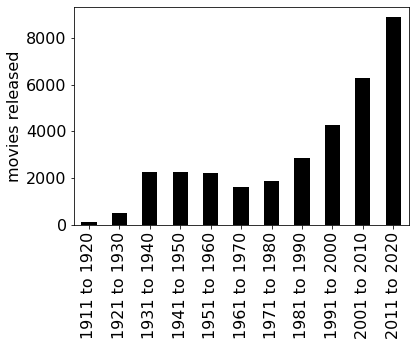

In [23]:
#Q10: Plot the number of movies released in each decade as a bar graph.
plot_dict(decadeMovies, 'movies released')

In [24]:
#Q11: Find the highest rated movies for each genre.
genreMax = {}
for genre in genres:
    movie = {}
    movie = max_rated_movies(genre_buckets[genre])
    genreMax[genre] = movie
genreMax

{'Action': [{'title': 'The Dark Knight',
   'year': 2008,
   'genres': ['Action', 'Crime', 'Drama'],
   'duration': 152,
   'directors': ['Christopher Nolan'],
   'actors': ['Christian Bale',
    'Heath Ledger',
    'Aaron Eckhart',
    'Michael Caine'],
   'rating': 9.0}],
 'Horror': [{'title': 'Psycho',
   'year': 1960,
   'genres': ['Horror', 'Mystery', 'Thriller'],
   'duration': 109,
   'directors': ['Alfred Hitchcock'],
   'actors': ['Anthony Perkins', 'Vera Miles', 'John Gavin'],
   'rating': 8.5}],
 'Sci-Fi': [{'title': 'Inception',
   'year': 2010,
   'genres': ['Action', 'Adventure', 'Sci-Fi'],
   'duration': 148,
   'directors': ['Christopher Nolan'],
   'actors': ['Leonardo DiCaprio',
    'Joseph Gordon-Levitt',
    'Ellen Page',
    'Tom Hardy'],
   'rating': 8.8}],
 'Crime': [{'title': 'The Godfather',
   'year': 1972,
   'genres': ['Crime', 'Drama'],
   'duration': 175,
   'directors': ['Francis Ford Coppola'],
   'actors': ['Marlon Brando', 'Al Pacino'],
   'rating': 9.

In [25]:
#Q12: Find the median rating of movies from each genre.
genreRating = {}
for genre in genres:
    ratings = []
    for i in range(len(genre_buckets[genre])):
        ratings.append(genre_buckets[genre][i]['rating'])
    genreRating[genre] = median(ratings)
genreRating

{'Action': 5.5,
 'Horror': 4.6,
 'Sci-Fi': 4.9,
 'Crime': 6.0,
 'Thriller': 5.1,
 'Comedy': 5.9,
 'Drama': 6.1,
 'Romance': 6.2,
 'History': 6.5,
 'Adventure': 6.0,
 'Western': 6.2,
 'Family': 5.9,
 'Fantasy': 5.7,
 'War': 6.4,
 'Sport': 6.1,
 'Biography': 6.7,
 'Mystery': 5.8,
 'Film-Noir': 6.6,
 'Music': 6.2,
 'Animation': 6.4,
 'Musical': 6.2,
 'Reality-TV': 2.1,
 'Documentary': 7.5,
 'News': 6.4}

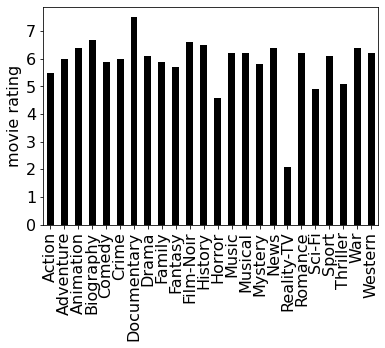

In [26]:
#Q13: Plot the median ratings of movies in each genre as a bar graph.
plot_dict(genreRating,'movie rating')

In [45]:
#Q14: Produce a list of genres sorted in decreasing order of their median rating.
genreSort = []
genre_ratings = dict(sorted(genreRating.items(), key=lambda item: item[1]))
for genre in genre_ratings:
    genreSort.append(genre)
genreSort.reverse()
genreSort

['Documentary',
 'Biography',
 'Film-Noir',
 'History',
 'News',
 'Animation',
 'War',
 'Musical',
 'Music',
 'Western',
 'Romance',
 'Sport',
 'Drama',
 'Adventure',
 'Crime',
 'Family',
 'Comedy',
 'Mystery',
 'Fantasy',
 'Action',
 'Thriller',
 'Sci-Fi',
 'Horror',
 'Reality-TV']

In [28]:
#Q15: Produce a list of Shrek movies sorted in increasing order of their year of release.
yearShrek = []
movieShrek = []
Shrek = find_specific_movies(movies,'Shrek')
for movie in Shrek:
    yearShrek.append(movie['year'])
yearShrek.sort()
for i in yearShrek:
    for movie in Shrek:
        if movie['year'] == i:
            movieShrek.append(movie)
movieShrek

[{'title': 'Shrek',
  'year': 2001,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 90,
  'directors': ['Andrew Adamson', 'Vicky Jenson'],
  'actors': ['Mike Myers', 'Eddie Murphy'],
  'rating': 7.8},
 {'title': 'Shrek 2',
  'year': 2004,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 93,
  'directors': ['Andrew Adamson', 'Kelly Asbury'],
  'actors': ['Mike Myers', 'Eddie Murphy'],
  'rating': 7.2},
 {'title': 'Shrek the Third',
  'year': 2007,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 93,
  'directors': ['Chris Miller', 'Raman Hui'],
  'actors': ['Mike Myers', 'Eddie Murphy', 'Cameron Diaz', 'Antonio Banderas'],
  'rating': 6.1},
 {'title': 'Shrek Forever After',
  'year': 2010,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 93,
  'directors': ['Mike Mitchell'],
  'actors': ['Mike Myers', 'Eddie Murphy', 'Cameron Diaz', 'Antonio Banderas'],
  'rating': 6.3},
 {'title': 'Shrek the Musical',
  'year': 2013,
  'genre

In [29]:
#Q16: Find a list of all movies in which 'Jodie Foster' is both an actor and director.
jodie = actors_buckets['Jodie Foster']
jodieMovie = []
for movie in jodie:
    if 'Jodie Foster' in movie['directors']:
        jodieMovie.append(movie)
jodieMovie

[{'title': 'Little Man Tate',
  'year': 1991,
  'genres': ['Drama'],
  'duration': 99,
  'directors': ['Jodie Foster'],
  'actors': ['Jodie Foster', 'Alex Lee', 'Adam Hann-Byrd'],
  'rating': 6.6}]

In [30]:
#Q17: What is the title of the longest movie both acted and directed by 'Clint Eastwood'?
clint = actors_buckets['Clint Eastwood']
clintMovie = []
for movie in clint:
    if 'Clint Eastwood' in movie['directors']:
        clintMovie.append(movie)
max = 0
for movie in clintMovie:
    if movie['duration'] > max:
        max = movie['duration']
        answer = movie['title']
answer

'A Perfect World'

In [31]:
#Q18: What are the titles of the movies directed by the Wachowskis contain both 'Action' and 'Adventure' in their genre?
wachMovies = directors_buckets['Lana Wachowski']
wachList = []
for movie in wachMovies:
    if 'Lilly Wachowski' in movie['directors']:
        if 'Action' in movie['genres'] and 'Adventure' in movie['genres']:
            wachList.append(movie['title'])
wachList

['Jupiter Ascending', 'Speed Racer']

In [32]:
#Q19: Find the titles of the 15 shortest Biographies in the dataset.
biographies = genre_buckets['Biography']
duration = []
title_list = []
for movie in biographies:
    duration.append(movie['duration'])
duration.sort()
duration = duration[:15]
for i in duration:
    for movie in biographies:
        if movie['duration'] == i:
            if movie['title'] not in title_list:
                title_list.append(movie['title'])
title_list

['Hibakusha',
 'King Candy',
 'Amy Winehouse: Fallen Star',
 'Steve Jobs: Visionary Genius',
 'The Road to Hollywood',
 'Danny Greene: The Rise and Fall of the Irishman',
 'From the Manger to the Cross; or, Jesus of Nazareth',
 'Joseph Smith: Prophet of the Restoration',
 'The Trade',
 'Blondes at Work',
 'Spirit of Youth',
 'The Loves of Edgar Allan Poe',
 'Alexander Hamilton',
 'Dillinger',
 'Memoria']

In [33]:
actors = []
for key in actors_buckets:
    actors.append(key)

In [34]:
#Q20: Find the top 25 actors with the highest median rating among those actors who have acted in at least 15 movies.
actorValid = {}
for actor in actors:
    if len(actors_buckets[actor])>14:
        actorValid[actor] = actors_buckets[actor]
actorRating = {}
for actor in actorValid:
    ratings = []
    for i in range(len(actorValid[actor])):
        ratings.append(actorValid[actor][i]['rating'])
    actorRating[actor] = median(ratings)
finalRating = dict(sorted(actorRating.items(), key=lambda item: item[1]))
finalList = []
for actor in finalRating:
    finalList.append(actor)
finalList.reverse()
finalList[:25]

['Audrey Hepburn',
 'Leonardo DiCaprio',
 'Ryan Gosling',
 'Woody Allen',
 'Harold Lloyd',
 'Laurence Olivier',
 'Ralph Fiennes',
 'Philip Seymour Hoffman',
 'Brad Pitt',
 'Tom Cruise',
 'Buster Keaton',
 'Christian Bale',
 'Russell Crowe',
 'Bill Murray',
 'Albert Brooks',
 'Bette Davis',
 'Judy Garland',
 'Jake Gyllenhaal',
 'Amy Adams',
 'Humphrey Bogart',
 'Groucho Marx',
 'Donald Crisp',
 'Matt Damon',
 'Chris Cooper',
 'Fred Astaire']